In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import joblib

### Import dataset

In [2]:
df = pd.read_csv("../dataset/usedcars.csv")
df

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO
...,...,...,...,...,...,...
145,2006,SES,6200,95000,Silver,AUTO
146,2002,SE,5995,87003,Red,AUTO
147,2000,SE,5980,96841,Red,AUTO
148,2001,SE,4899,151479,Yellow,AUTO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          150 non-null    int64 
 1   model         150 non-null    object
 2   price         150 non-null    int64 
 3   mileage       150 non-null    int64 
 4   color         150 non-null    object
 5   transmission  150 non-null    object
dtypes: int64(3), object(3)
memory usage: 7.2+ KB


there is no missing value

In [5]:
df.nunique()

year             13
model             3
price           117
mileage         150
color             9
transmission      2
dtype: int64

### 1. How to split our data?

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# split the x and y variables
X = df.drop(["price"], axis=1)
y = df["price"]

let us split using 60:20:20 for train:validation:test

In [10]:
# split train-test 60:40
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# split test-validation 50:50
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [11]:
print(f'train size: {len(y_train)}')
print(f'valid size: {len(y_valid)}')
print(f'test size: {len(y_test)}')

train size: 90
valid size: 30
test size: 30


In [12]:
joblib.dump(x_train, "../intermediate_results/x_train.pkl")
joblib.dump(y_train, "../intermediate_results/y_train.pkl")
joblib.dump(x_valid, "../intermediate_results/x_valid.pkl")
joblib.dump(y_valid, "../intermediate_results/y_valid.pkl")
joblib.dump(x_test, "../intermediate_results/x_test.pkl")
joblib.dump(y_test, "../intermediate_results/y_test.pkl")

['../intermediate_results/y_test.pkl']

### 2. What kind of pre-process we could do about this dataset?

#### feature transformations: standardizing

In [13]:
from sklearn.preprocessing import StandardScaler

In [38]:
numerics = ["mileage"]
num_targets = ["price"]

scaler_tr = StandardScaler()
scaler_val = StandardScaler()
scaler_test = StandardScaler()

# fit to data
scaler_tr.fit(x_train[numerics])
scaler_val.fit(x_valid[numerics])
scaler_test.fit(x_test[numerics])

# transform the data
x_tr_transformed = scaler_tr.transform(x_train[numerics])
x_val_transformed = scaler_val.transform(x_valid[numerics])
x_test_transformed = scaler_test.transform(x_test[numerics])

In [48]:
non_numerics = ["year", "model", "color", "transmission"]
x_tr_transformed = pd.DataFrame(x_tr_transformed)
x_tr_transformed.columns = ["mileage"]
x_tr_transformed = x_tr_transformed.reset_index(drop=True)
x_tr_transformed[non_numerics] = x_train[non_numerics].reset_index(drop=True)
x_tr_transformed

,mileage,year,model,color,transmission
0,1.272092,2007,SES,Black,MANUAL
1,-0.901637,2009,SEL,Blue,AUTO
2,-0.557884,2010,SE,Blue,AUTO
3,-0.720852,2010,SEL,Black,AUTO
4,-0.316900,2010,SE,Black,AUTO
...,...,...,...,...,...
85,-0.224350,2009,SES,Black,AUTO
86,-0.174847,2010,SE,Green,AUTO
87,-1.073236,2011,SE,White,AUTO
88,-0.476732,2009,SE,Gray,AUTO


In [42]:
x_val_transformed = pd.DataFrame(x_val_transformed)
x_val_transformed.columns = ["mileage"]
x_val_transformed = x_val_transformed.reset_index(drop=True)
x_val_transformed[non_numerics] = x_valid[non_numerics].reset_index(drop=True)
x_val_transformed

,mileage,year,model,color,transmission
0,-0.599564,2009,SEL,Silver,AUTO
1,-0.322946,2009,SE,Black,MANUAL
2,-0.286859,2010,SES,Black,AUTO
3,-0.305806,2009,SE,Blue,AUTO
4,-0.254826,2010,SES,Silver,AUTO
5,1.283048,2007,SES,Silver,AUTO
6,-1.335323,2011,SES,Silver,AUTO
7,0.036323,2009,SEL,Red,AUTO
8,-0.742509,2011,SE,White,AUTO
9,0.094288,2010,SES,Black,AUTO


In [43]:
x_test_transformed = pd.DataFrame(x_test_transformed)
x_test_transformed.columns = ["mileage"]
x_test_transformed = x_test_transformed.reset_index(drop=True)
x_test_transformed[non_numerics] = x_test[non_numerics].reset_index(drop=True)
x_test_transformed

,mileage,year,model,color,transmission
0,0.424102,2008,SES,Red,AUTO
1,0.484998,2009,SES,Black,AUTO
2,0.923190,2006,SE,White,AUTO
3,0.097072,2010,SE,Gray,AUTO
4,-1.286606,2011,SEL,Green,AUTO
5,-0.500836,2010,SE,Black,AUTO
6,-1.357064,2011,SEL,Yellow,AUTO
7,-0.192464,2010,SE,White,MANUAL
8,-0.350217,2010,SE,Black,AUTO
9,-0.326315,2010,SES,Red,AUTO


#### feature encoding: one-hot encoding

In [65]:
from sklearn.preprocessing import OneHotEncoder

In [76]:
encoder = OneHotEncoder(handle_unknown="ignore")

encoded_tr = pd.DataFrame(encoder.fit_transform(x_tr_transformed[["model", "color", "transmission"]]).toarray())

encoded_tr_final = x_tr_transformed.join(encoded_tr)

,mileage,year,model,color,transmission,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.272092,2007,SES,Black,MANUAL,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.901637,2009,SEL,Blue,AUTO,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.557884,2010,SE,Blue,AUTO,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.720852,2010,SEL,Black,AUTO,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.316900,2010,SE,Black,AUTO,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,-0.224350,2009,SES,Black,AUTO,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,-0.174847,2010,SE,Green,AUTO,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
87,-1.073236,2011,SE,White,AUTO,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
88,-0.476732,2009,SE,Gray,AUTO,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [82]:
encoded_tr_final = encoded_tr_final.drop(["model", "color", "transmission"], axis=1)
encoded_tr_final.columns = ["mileage", "year"] + list(encoder.get_feature_names_out())
encoded_tr_final

,mileage,year,model_SE,model_SEL,model_SES,color_Black,color_Blue,color_Gold,color_Gray,color_Green,color_Red,color_Silver,color_White,color_Yellow,transmission_AUTO,transmission_MANUAL
0,1.272092,2007,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.901637,2009,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.557884,2010,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.720852,2010,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.316900,2010,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,-0.224350,2009,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,-0.174847,2010,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
87,-1.073236,2011,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
88,-0.476732,2009,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [92]:
# build a function after understanding the process of encoding scratched above
def encode(df_in, handleUnknown = "ignore"):
    df_in = df_in.copy()
    encoder = OneHotEncoder(handle_unknown=handleUnknown)
    encoder.fit(x_tr_transformed[["model", "color", "transmission"]])
    
    encoded = pd.DataFrame(encoder.transform(df_in[["model", "color", "transmission"]]).toarray())

    encoded = df_in.join(encoded)

    encoded = encoded.drop(["model", "color", "transmission"], axis=1)

    encoded.columns = ["mileage", "year"] + list(encoder.get_feature_names_out())

    return encoded

In [93]:
encoded_valid_final = encode(x_val_transformed)
encoded_test_final = encode(x_test_transformed)

In [97]:
joblib.dump(encoded_tr_final, "../intermediate_results/encoded_tr.pkl")
joblib.dump(encoded_valid_final, "../intermediate_results/encoded_valid.pkl")
joblib.dump(encoded_test_final, "../intermediate_results/encoded_test.pkl")

['../intermediate_results/encoded_test.pkl']

### 3. How to perfrom EDA on such of this data ?

Correlation matrix(?)

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

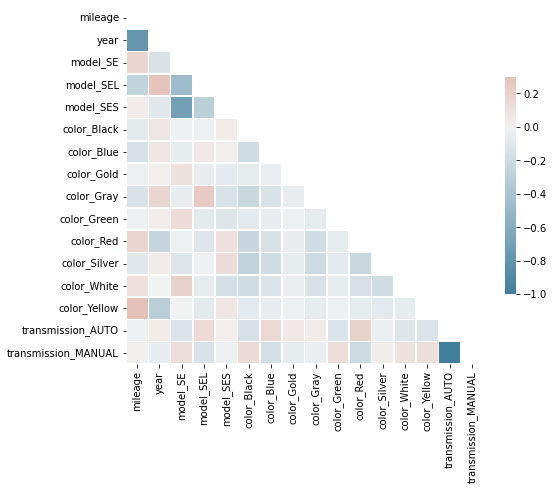

In [53]:
# compute correlation matrix
tr_corr = encoded_tr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(tr_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(tr_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Figure size 864x576 with 0 Axes>

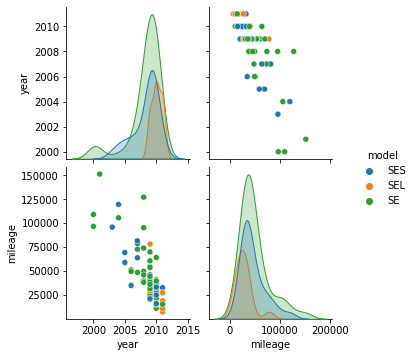

In [55]:
plt.figure(figsize=(12, 8))
sns.pairplot(x_train, hue="model")
plt.show()

### 4. What ML Algorithm/Model we could utilized?

#### Baseline: Linear Regression

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
reg = LinearRegression()
reg.fit(encoded_tr_final, y_train)

LinearRegression()

#### KNN regressor

In [118]:
from sklearn.neighbors import KNeighborsRegressor
n_neighbors = 5

In [119]:
knn = KNeighborsRegressor(n_neighbors)
knn.fit(encoded_tr_final, y_train)


KNeighborsRegressor()

#### SVR

In [123]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(encoded_tr_final, y_train)

SVR()

### 5. How to assess our models performance?

In [130]:
def get_prediction(model):
    return pd.Series({
        'model': model,
        'RMSE': f'{mean_squared_error(y_valid, model.predict(encoded_valid_final)):.2f}',
        'R^2': f'{r2_score(y_valid, model.predict(encoded_valid_final)):.2f}'
    })

In [137]:
pd.DataFrame([get_prediction(reg), get_prediction(knn), get_prediction(svr)])

,model,RMSE,R^2
0,LinearRegression(),2310377.29,0.73
1,KNeighborsRegressor(),1823799.92,0.78
2,SVR(),8505304.61,-0.00
